 ### Part I: Research Question
 
**A.  Describe the purpose of this data mining report by doing the following:**

**1. Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods:**

* **k-nearest neighbor (KNN)**

* **Naive Bayes**

We will be analyzing the medical data set for this analysis. Our research question for this performance assessment is:
**Is it possible to predict which patients are at risk of being readmitted into the hospital?** 

We will be using the k-nearest neighbor classification method for this analysis.


**2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.**

The goal of this data analysis is to explore if there are key characteristics of patients that are likely to be readmitted. Using the k-nearest neighbor (knn) method, we will be able to classify whether a patient is at risk of readmission to help the hospital take preventative measures.

### Part II: Method Justification

**B.  Explain the reasons for your chosen classification method from part A1 by doing the following:**

**1.  Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.**

The KNN method is a data classification method for estimating the likelihood that a data point will be classified as one group or another based on what group the data points nearest to it belong to. We use the variable 'k' to determine how many of the nearest data points to consider when classifing the data point. If k = 1, we would use the nearest neighbor to determine the data point's class, if k = 15, we would use the 15 nearest neighbors to make the classification, and so forth.

KNN in the context of our analysis will be used to classify if a patient is at risk to be readmitted or not. We expect that the outcome of our analysis will have a model accuracy of at least 95% without over or underfitting the model. Another expected outcome is to have the test data classified according to their nearest neighbors.

**2.  Summarize one assumption of the chosen classification method.**

The assuption of the KNN models are as follows:

* The k-nearest neighbors (k-NN) classification method assumes that similar things exist in proximity to each other.  
* If a data point is far away from another group, it’s dissimilar to those data points. 
* The algorithm depends on this assumption being true enough for the algorithm to be useful. 


**3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.**

We will be using the following libraries for this analysis:

* Pandas - We will using pandas we will upload the data into our workspace
* Seaborn - We will be using Seaborn for the data visualizations (scatterplot and heatmap)
* MatPlotLib - We will be using MatPlotLib to show our data visualization graphs
* SKLearn - We will be using SKLearn for the knn classification, we will use this package to split the data, confusion matrix, classification report, and to select variables with p-values < 0.05

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest


%matplotlib inline

In [2]:
# load the data into the workspace
df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D207\Medical Data - 207\medical_clean.csv")

### Part III: Data Preparation

**C.  Perform data preparation for the chosen data set by doing the following:**

**1.  Describe one data preprocessing goal relevant to the classification method from part A1.**

These are our data preprocessing goals to run our KNN analysis:
* Evaluate the column names and rename the columns that are unclear, long, or misspellings
* Run isnull() to determine if there are any missing values in the dataset
* Use data visualizations to determine if there are outliers
* Scaling the data. Scaling is process of transforming data to fit within a specific scale (for example, from 0-100 or 0-1) We will want to scale data since we are using methods based on (distance) measures of how far apart data points are.
* Standardize the data to avoid bias towards the predictors
<br>

**2.  Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.**

We will be using the medical dataset for this analysis.

The following variables will be dropped from our data set since they are not relevant measures for our research question: *Customer_id, CaseOrder, Interaction, UID, City, State, County, Zip, Lat, Lng, Area, TimeZone, Job, Marital, and Population*.

We then will use SelectKBest to drop the variables that have a p-value above 0.05, since those with a p-value above 0.05 are considered statisitically insignificant. Finally, we will also drop TotalCharge as it is highly correlated with Initial_days. As such, we have reduced the dataset to the following:

* Initial_days - Continous
* DummyXRAYServices - Categorical
* Children - Numerical variable, discrete
* DummyEmergency_Admin - Categorical

**3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.**

This analysis will follow the following step to prepare the data for the analysis:

* Load the data into the data frame using pd.get_csv()
* View the data using the describe() and .columns  and evaluate the data structures and data types using .dtypes
* Rename the columns to give proper naming for the predictors
* Identify, remove, and remedy null values and missing data from our data set
* Convert categorical variables into dummy variables
* Look for any outliers in data using data visualizaion
* Select variables/features (using SelectKBest from scikit-learn) to improve model efficiency, we will select variables that have a p-value below 0.05
* Look for correlation in data and remove. Correlated features will carry extra weight on the distance calculation than desired which could negatively impact the model
* Finally, we will scale the features, the k-NN algorithm relies on distance for classification, k-NN accuracy can degrade if data is not consistent with their importance.

The code for these data preparation steps are provided in the annotated code below.
<br>

**4.  Provide a copy of the cleaned data set.**

The copy of the cleaned data set will be attached with this performance assessment.

In [3]:
# let's view the data
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [4]:
# view data using describe()
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
# view data using columns
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [6]:
# Rename the last 8 columns to reflect what the variables measure

df.rename(columns = {
    'Item1':'TimelyAdmission',
    'Item2':'TimelyTreatment',
    'Item3':'TimelyVisits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'TreatmentTime',
    'Item7':'Courteous',
    'Item8':'ActiveListening'
}, inplace=True)

df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListening'],
      dtype='object')

In [7]:
# Check for missing values
display(df.isnull().any())

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [8]:
# great, no null values. let's look at the types of data df includes
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
# Now we will drop variables that are not relevant / measurable to the research question
df = df.drop(['Customer_id','CaseOrder','Interaction','UID','City','State','County','Zip','Lat','Lng', 
             "Area",'TimeZone','Job','Marital', 'Population'], axis=1)

In [10]:
# Let's get a list of the categorical variables and their unique values

for c in df.loc[:, df.columns]: # We are looking for columns in df
    if df.dtypes[c] == "object": # select columns that dtype = object
        print('\n{} is categorical: {}.'.format(c, df[c].unique()))
    if df.dtypes[c] == "int64":
        print('\n{} is numerical.'.format(c))
    if df.dtypes[c] == "float64":
        print('\n{} is numerical'.format(c))


Children is numerical.

Age is numerical.

Income is numerical

Gender is categorical: ['Male' 'Female' 'Nonbinary'].

ReAdmis is categorical: ['No' 'Yes'].

VitD_levels is numerical

Doc_visits is numerical.

Full_meals_eaten is numerical.

vitD_supp is numerical.

Soft_drink is categorical: ['No' 'Yes'].

Initial_admin is categorical: ['Emergency Admission' 'Elective Admission' 'Observation Admission'].

HighBlood is categorical: ['Yes' 'No'].

Stroke is categorical: ['No' 'Yes'].

Complication_risk is categorical: ['Medium' 'High' 'Low'].

Overweight is categorical: ['No' 'Yes'].

Arthritis is categorical: ['Yes' 'No'].

Diabetes is categorical: ['Yes' 'No'].

Hyperlipidemia is categorical: ['No' 'Yes'].

BackPain is categorical: ['Yes' 'No'].

Anxiety is categorical: ['Yes' 'No'].

Allergic_rhinitis is categorical: ['Yes' 'No'].

Reflux_esophagitis is categorical: ['No' 'Yes'].

Asthma is categorical: ['Yes' 'No'].

Services is categorical: ['Blood Work' 'Intravenous' 'CT Scan' 'M

In [11]:
# We will change the categorical variables to binary numerical values (1 or 0)

df['DummyGender'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['DummyReAdmis'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]
df['DummySoft_drink'] = [1 if v == 'Yes' else 0 for v in df['Soft_drink']]
df['DummyHighBlood'] = [1 if v == 'Yes' else 0 for v in df['HighBlood']]
df['DummyStroke'] = [1 if v == 'Yes' else 0 for v in df['Stroke']]
df['DummyOverweight'] = [1 if v == 'Yes' else 0 for v in df['Overweight']]
df['DummyArthritis'] = [1 if v == 'Yes' else 0 for v in df['Arthritis']]
df['DummyDiabetes'] = [1 if v == 'Yes' else 0 for v in df['Diabetes']]
df['DummyHyperlipidemia'] = [1 if v == 'Yes' else 0 for v in df['Hyperlipidemia']]
df['DummyBackPain'] = [1 if v == 'Yes' else 0 for v in df['BackPain']]
df['DummyAnxiety'] = [1 if v == 'Yes' else 0 for v in df['Anxiety']]
df['DummyAllergic_rhinitis'] = [1 if v == 'Yes' else 0 for v in df['Allergic_rhinitis']]
df['DummyReflux_esophagitis'] = [1 if v == 'Yes' else 0 for v in df['Reflux_esophagitis']]
df['DummyAsthma'] = [1 if v == 'Yes' else 0 for v in df['Asthma']]

# For Emergency_Admin, we will assign 1 to all emergency admission and 0 for the rest
df['DummyEmergency_Admin'] = [1 if v == 'Emergency Admission' else 0 for v in df['Initial_admin']]

# For Complication_Risk, we will assign 1 to all high complications and 0 for medium and low
df['DummyHighComplication_risk'] = [1 if v == 'High' else 0 for v in df['Complication_risk']]

# For Services, we will assign 1 to all xray scans (CT scan and MRI) and 0 to other services (blood work and IV)
df['DummyXRAYServices'] = [1 if v == ('CT Scan' or 'MRI') else 0 for v in df['Services']]

df.columns

Index(['Children', 'Age', 'Income', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'TimelyAdmission', 'TimelyTreatment', 'TimelyVisits', 'Reliability',
       'Options', 'TreatmentTime', 'Courteous', 'ActiveListening',
       'DummyGender', 'DummyReAdmis', 'DummySoft_drink', 'DummyHighBlood',
       'DummyStroke', 'DummyOverweight', 'DummyArthritis', 'DummyDiabetes',
       'DummyHyperlipidemia', 'DummyBackPain', 'DummyAnxiety',
       'DummyAllergic_rhinitis', 'DummyReflux_esophagitis', 'DummyAsthma',
       'DummyEmergency_Admin', 'DummyHighComplication_risk',
       'DummyXRAYServices'],
      dtype='object')

In [12]:
# drop the variables that have been assigned dummy variables
df = df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp','Initial_days',
       'TotalCharge', 'Additional_charges', 'TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListening', 'DummyReAdmis', 'DummyGender',
       'DummySoft_drink', 'DummyDiabetes', 'DummyStroke',
       'DummyArthritis', 'DummyHyperlipidemia', 'DummyBackPain', 'DummyAnxiety',
       'DummyAllergic_rhinitis', 'DummyReflux_esophagitis', 'DummyAsthma', 
        'DummyHighBlood', 'DummyXRAYServices', 'DummyEmergency_Admin', 'DummyHighComplication_risk', 'DummyOverweight']]

In [13]:
# use SelectKBest to select statistically significant variables with p < 0.05

# assign values to X for all predictor features
# assign values to y for the dependent variable

X = df.drop(["DummyReAdmis"],1)
y = df["DummyReAdmis"]

# print the shape of our X, y variables
print(X.shape)
print(y.shape)

# assign feature_names to the column names of X 
feature_names = X.columns

# initialize the class and call fit_transform
skbest = SelectKBest(k='all')
X_new = skbest.fit_transform(X, y)
X_new.shape

# find the P-values to select statistically significant features 
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]

# assign features_to_keep with variables with p_values below 0.05
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

# print the name of the selected features
features_to_keep

(10000, 34)
(10000,)


8              TotalCharge
7             Initial_days
30       DummyXRAYServices
0                 Children
31    DummyEmergency_Admin
Name: Feature, dtype: object

In [14]:
df_reduced = df[['TotalCharge', 'Initial_days', 'DummyXRAYServices', 'Children', 'DummyEmergency_Admin', 'DummyReAdmis']]

In [15]:
df_reduced

,TotalCharge,Initial_days,DummyXRAYServices,Children,DummyEmergency_Admin,DummyReAdmis
0,3726.702860,10.585770,0,1,1,0
1,4193.190458,15.129562,0,3,1,0
2,2434.234222,4.772177,0,3,0,0
3,2127.830423,1.714879,0,0,0,0
4,2113.073274,1.254807,1,1,0,0
...,...,...,...,...,...,...
9995,6850.942000,51.561220,0,2,1,0
9996,7741.690000,68.668240,1,4,0,1
9997,8276.481000,70.154180,0,3,0,1
9998,7644.483000,63.356900,0,3,1,1


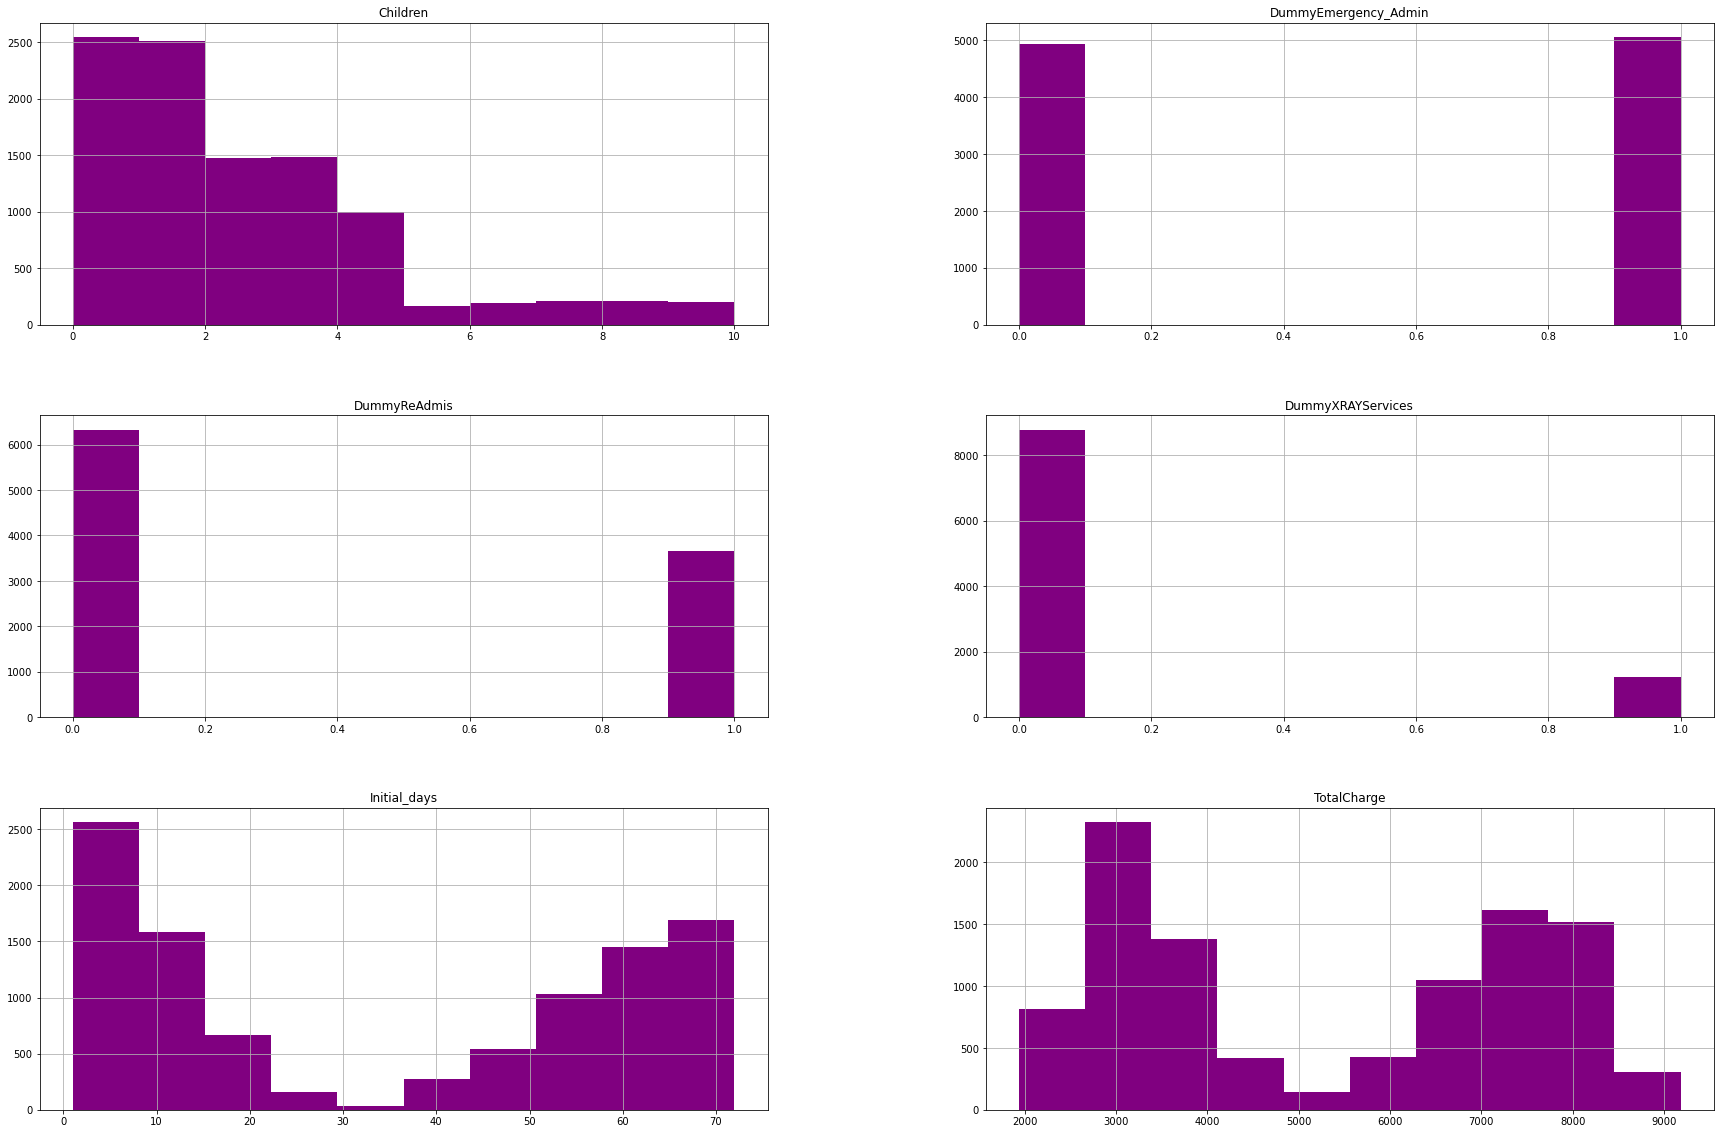

In [16]:
# Histograms of the continous variables to scan for outliers
df_reduced[['TotalCharge', 'Initial_days', 'DummyXRAYServices', 'Children', 'DummyEmergency_Admin', 'DummyReAdmis']].hist(figsize=(30,20),color='purple')
plt.show()

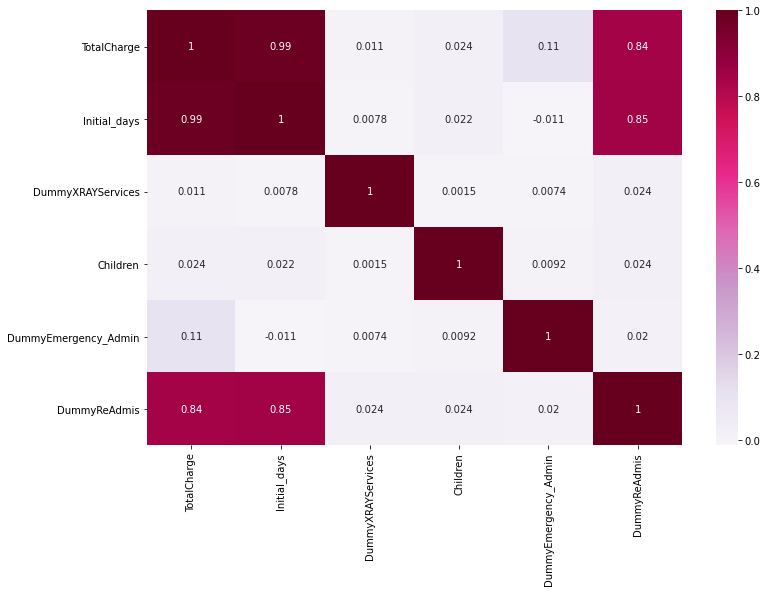

In [17]:
# the graph shows no outliers, ;et's look for correlation in data

plt.figure(figsize=(12,8))
sns.heatmap(df_reduced.corr(), annot=True, cmap='PuRd')

In [18]:
# Looks like there are some highly correlated variables in our data

# TotalCharge and Initial_days are highly correlated, we will drop TotalCharge

df_reduced = df_reduced.drop('TotalCharge', axis=1)

df_reduced

,Initial_days,DummyXRAYServices,Children,DummyEmergency_Admin,DummyReAdmis
0,10.585770,0,1,1,0
1,15.129562,0,3,1,0
2,4.772177,0,3,0,0
3,1.714879,0,0,0,0
4,1.254807,1,1,0,0
...,...,...,...,...,...
9995,51.561220,0,2,1,0
9996,68.668240,1,4,0,1
9997,70.154180,0,3,0,1
9998,63.356900,0,3,1,1


In [19]:
df_reduced.to_csv('cleaned_reduced_data.csv')

### Part IV: Analysis

**D.  Perform the data analysis and report on the results by doing the following:**



**1.  Split the data into training and test data sets and provide the file(s).**

Please see below:

In [20]:
X = df_reduced.drop(["DummyReAdmis"],1)
y = df_reduced["DummyReAdmis"]

# print the shape of our X, y variables
print(X.shape)
print(y.shape)

(10000, 4)
(10000,)


In [21]:
# Split dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=42, stratify=y)

**2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.**

This analysis will be using knn classification to predict readmission. This analysis used the following techniques:
* The total number of neighbors used is 9, this analysis used the GridSearchCV to determine the best parameters for k.
* There were no weights specified in the analysis, we will use the default ‘uniform’ that indicated that all points in each neighborhood are weighted equally.
* There was no algorithm specified, the ‘auto’ algorithm is the default that we went with in this analysis as the code wwill attempt to decide the most appropriate algorithm based on the values passed to fit method


**3.  Provide the code used to perform the classification analysis from part D2.**

Please see below for the classification analysis:

In [22]:
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV

# Set up parameters grid
param_grid = {'n_neighbors': np.arange(1, 10)}

# Re-intantiate KNN for cross validation
knn = KNeighborsClassifier()

# Instantiate GridSearch cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit model
knn_cv.fit(X_train, y_train)

# Print best parameters
print('Best parameters for this KNN model: {}'.format(knn_cv.best_params_))

print('Best score: {:0.4f}'.format(knn_cv.best_score_))

Best parameters for this KNN model: {'n_neighbors': 9}
Best score: 0.9793


In [23]:
# Create a k-NN classifier with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=9)

In [24]:
# prediction
y_pred = knn.predict(X_test)

# print the prediction
print("The test set predictions are:\n{}".format(y_pred))

# return the mean accuracy on the given test data and labels
print("\nAccuracy score of the initial knn analysis: {}".format(knn.score(X_test, y_test)))

The test set predictions are:
[0 0 0 ... 0 1 0]

Accuracy score of the initial knn analysis: 0.983


In [25]:
# Create pipeline object & scale dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Set steps for pipeline object
steps = [('scaler', StandardScaler()),
 ('knn', KNeighborsClassifier(n_neighbors=8))]

# Instantiate pipeline
pipeline = Pipeline(steps)

# Split dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Scale dateframe with pipeline object
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

# Predict from scaled dataframe
y_pred_scaled = pipeline.predict(X_test_scaled)

print('New accuracy score of scaled KNN model: {:0.3f}'.format(accuracy_score(y_test_scaled, y_pred_scaled)))

New accuracy score of scaled KNN model: 0.974


In [26]:
# export the training and test data to csv files, scaled
# the scaled split data is included as an attachment along with the performance assessment

pd.DataFrame(X_train_scaled).to_csv('X_train_scaled.csv')
pd.DataFrame(X_test_scaled).to_csv('X_test_scaled.csv')
pd.DataFrame(y_train_scaled).to_csv('y_train_scaled.csv')
pd.DataFrame(y_test_scaled).to_csv('y_test_scaled.csv')

Our accuracy score has reduced when scaling the data, however, it is important to note that scaling the data is an essential step in knn analysis.

K-nearest neighbors uses distance measure and is sensitive to magnitudes and hence should be scaled for all features to weigh in equally (Roy, 2020). As such, we will continue to used the scaled data for our analysis. 

In [27]:
print(confusion_matrix(y_test_scaled, y_pred_scaled))

[[1895   39]
 [  40 1026]]


Our model returns 1895 True Positives, 1026 True Negatives, 39 False Positives, and 40 False Negatives.

In [28]:
print(classification_report(y_test_scaled, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1934
           1       0.96      0.96      0.96      1066

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [29]:
# Import ROC AUC metrics for explaining the area under the curve
from sklearn.metrics import roc_auc_score

# Fit it to the data
knn_cv.fit(X, y)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test_scaled)[:,1]

# Compute and print AUC score
print("The area under curve (AUC) on validation dataset is: {:.4f}".format(roc_auc_score(y_test_scaled, y_pred_prob)))

The area under curve (AUC) on validation dataset is: 0.9997


In [30]:
from sklearn.model_selection import cross_val_score

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.99727149 0.99250681 0.9986376  0.99649984 0.94967468]


### Part V: Data Summary and Implications

**E.  Summarize your data analysis by doing the following:**

**1.  Explain the accuracy and the area under the curve (AUC) of your classification model.**

The accuracy of our knn analysis yielded 0.974, or 97.4% accuracy. Our AUC curve yielded 0.9997.


**2.  Discuss the results and implications of your classification analysis.**

Our classification report returned the following:

**Precision** — percent of predictions that were correct (calculated by TP/(TP + FP))
* 98% of false predictions were correct
* 96% of true predictions were correct

**Recall** —  percent of the positive cases that were caught (calculated by TP/(TP+FN))
* 98% of false cases were caught 
* 96% of true cases were caught 

**F1 score** — percent of positive predictions were correct?(calculated by 2*(Recall * Precision) / (Recall + Precision))
* 98% of false predictions were correct
* 96% of true predictions were correct

**Support** is the number of actual occurrences of the class in the specified dataset.


**3.  Discuss one limitation of your data analysis.**

The knn method is an easily implemented machine learning classification, however, there are a few limitations to the method. The knn method does not work well with high dimensionality as this will complicate the distance calculating process to calculate distance for each dimension. Additionally, the method is sensitive to noisy and missing data (Soni, 2020).

Another note is that while performing this analysis, the method appears to be memory intensive as a few of the calculations took several minutes to load.


**4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.**

The analysis conducted yielded an accuracy score of 0.974 and an AUC metric of 0.99. These results suggest that the knn method provides high accuracy when classifying whether a patient is likely to readmit into hospital care. Based on these results, I would recommend the hospital to utilize the knn analysis to predict whether patients are likely to readmit into the hospital. Furthermore, once the hospital has classified a patient to be at risk of readmission, I would recommend the hospital to take a course of action to prevent the rehospitalization (whether that is additional testing, additional days in hospital for observation, re-evaluation, etc).

### Part VI: Demonstration

#### F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

Please see the following link for the Panopto video: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=110d5308-f40c-459e-92ac-af6b013c4187

#### G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

Hachcham, Aymane. “The KNN Algorithm - Explanation, Opportunities, Limitations.” Neptune.ai, 14 Nov. 2022, https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations. 

Roy, Baijayanta. “All about Feature Scaling.” Medium, Towards Data Science, 7 Apr. 2020, https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35. 

Soni, Anuuz. “Advantages and Disadvantages of KNN.” Medium, Medium, 3 July 2020, https://medium.com/@anuuz.soni/advantages-and-disadvantages-of-knn-ee06599b9336. 

#### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

This task is exemplified throughout the performance assessment.

#### I.  Demonstrate professional communication in the content and presentation of your submission.

This task is exemplified throughout the performance assessment.